### Checking dataset Ratings

In [1]:
import pandas as pd

ratings = pd.read_csv('ml-latest-small/ratings.csv')
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### What values ​​exist in the rating column?

In [3]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### How many values ​​of each type are there in the rating column?

In [4]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

#### Calculating the average of all values ​​in the rating column

In [5]:
ratings['rating'].mean()

3.501556983616962

#### Calculating the median of all values ​​in the rating column

In [8]:
ratings['rating'].median()

3.5

#### Ratings column general summary

In [9]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

##### From the above result, we can conclude that 25% of the movie grades in the dataset are less than 3.0

#### Plotting the histogram of the ratings column

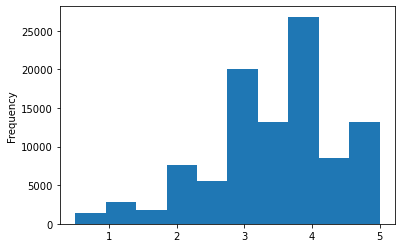

In [16]:
ratings.rating.plot(kind = 'hist')

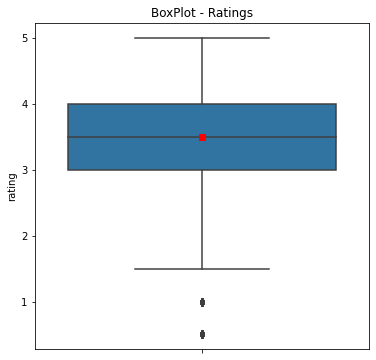

In [13]:
plt.figure(figsize = (6,6))
plt.title('BoxPlot - Ratings')
sns.boxplot(y = ratings.rating, 
            showmeans = True, 
            meanprops = {"marker":"s","markerfacecolor":"red", "markeredgecolor":"red"})

plt.show()

##### Conclusion: half of the people gave grades between 3 and 4, 25% gave grades between 4 and 5, that at least 25% of the grades are between 1.5 and 3, and that grades 1 and 0.5 (which are outliers) occur rarely compared to the other notes

##### Outliers indicate possible outliers.

### Checking dataset Movies